In [ ]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from PIL import Image

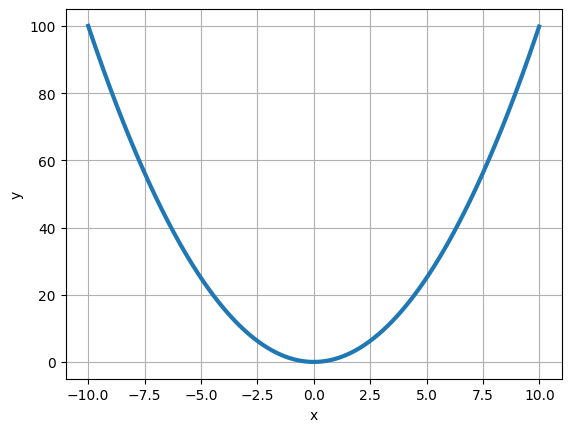

In [ ]:
x = np.arange(-10,10, 0.01)
y = x**2
plt.plot(x,y, lw=3)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

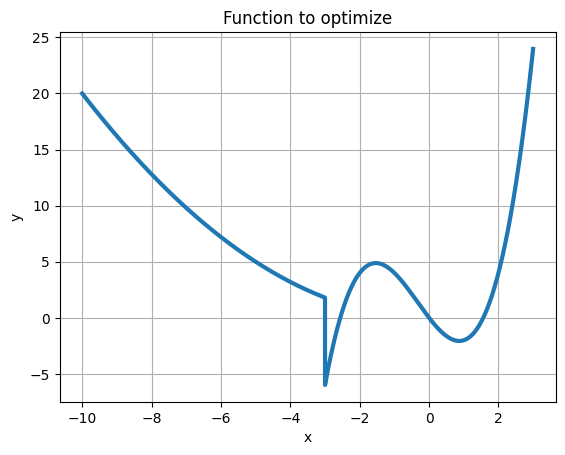

In [ ]:
def function(x):
  y = []
  for i in x:
    if i>-3:
      y.append(i**2-4*i+i**3)
    else:
      y.append(0.2*i**2)
  return y
x = np.arange(-10,3, 0.001)
y = function(x)
plt.plot(x,y, lw=3)
plt.title('Function to optimize')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# Generating a population

In [ ]:
def populate(size):
  x1,x2 = -10, 3 #x1, x2 = right and left boundaries of our X axis
  pop = rnd.uniform(x1,x2, size) # size = amount of particles in population
  return pop

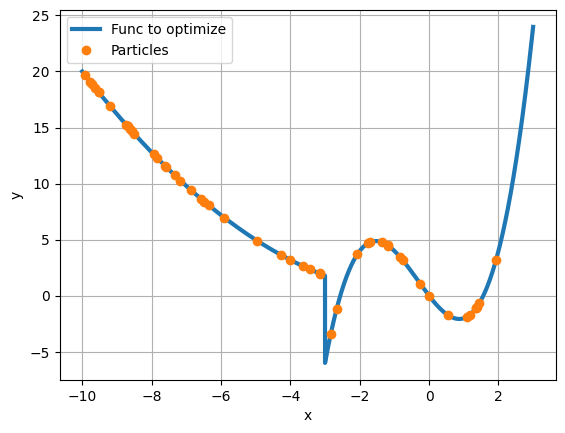

In [ ]:
x1=populate(50) #testing the population
y1=function(x1)
plt.plot(x,y, lw=3, label='Func to optimize')
plt.plot(x1,y1,marker='o', ls='', label='Particles')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Defining the algorithm



In [ ]:
POP_SIZE = 10 #population size
MAX_ITER = 30 #the amount of optimization iterations
w = 0.9 #inertia weight
c1 = 1 #personal acceleration factor
c2 = 2 #social acceleration factor

In [ ]:
"""Particle Swarm Optimization (PSO)"""
particles = populate(POP_SIZE) #generating a set of particles
velocities = np.zeros(np.shape(particles)) #velocities of the particles
gains = -np.array(function(particles)) #calculating function values for the population

best_positions = np.copy(particles) #it's our first iteration, so all positions are the best
swarm_best_position = particles[np.argmax(gains)] #x with with the highest gain
swarm_best_gain = np.max(gains) #highest gain

l = np.empty((MAX_ITER, POP_SIZE))

for i in range(MAX_ITER):
    l[i] = np.array(np.copy(particles))
    r1 = rnd.uniform(0, 1, POP_SIZE) #random coefficient for personal behavior
    r2 = rnd.uniform(0, 1, POP_SIZE) #random coefficient for social behavior

    velocities = np.array(w * velocities + c1 * r1 * (best_positions - particles) + c2 * r2 * (swarm_best_position - particles)) #calculating velocities

    particles+=velocities #updating position by adding the velocity

    new_gains = -np.array(function(particles)) #calculating new gains

    idx = np.where(new_gains > gains) #getting index of Xs, which have a greater gain now
    best_positions[idx] = particles[idx] #updating the best positions with the new particles
    gains[idx] = new_gains[idx] #updating gains

    if np.max(new_gains) > swarm_best_gain: #if current maxima is greateer than across all previous iters, than assign
        swarm_best_position = particles[np.argmax(new_gains)]
        swarm_best_gain = np.max(new_gains)
    print(f'Iteration {i+1} \tGain: {swarm_best_gain}')

Iteration 1 	Gain: 2.0112271609662464
Iteration 2 	Gain: 2.0112271609662464
Iteration 3 	Gain: 2.064071483682428
Iteration 4 	Gain: 2.064071483682428
Iteration 5 	Gain: 3.4976172923709896
Iteration 6 	Gain: 3.4976172923709896
Iteration 7 	Gain: 3.4976172923709896
Iteration 8 	Gain: 3.4976172923709896
Iteration 9 	Gain: 3.4976172923709896
Iteration 10 	Gain: 3.4976172923709896
Iteration 11 	Gain: 3.4976172923709896
Iteration 12 	Gain: 3.4976172923709896
Iteration 13 	Gain: 5.402339604089555
Iteration 14 	Gain: 5.402339604089555
Iteration 15 	Gain: 5.402339604089555
Iteration 16 	Gain: 5.402339604089555
Iteration 17 	Gain: 5.402339604089555
Iteration 18 	Gain: 5.402339604089555
Iteration 19 	Gain: 5.402339604089555
Iteration 20 	Gain: 5.402339604089555
Iteration 21 	Gain: 5.80903344367028
Iteration 22 	Gain: 5.80903344367028
Iteration 23 	Gain: 5.80903344367028
Iteration 24 	Gain: 5.80903344367028
Iteration 25 	Gain: 5.80903344367028
Iteration 26 	Gain: 5.80903344367028
Iteration 27 	Gai

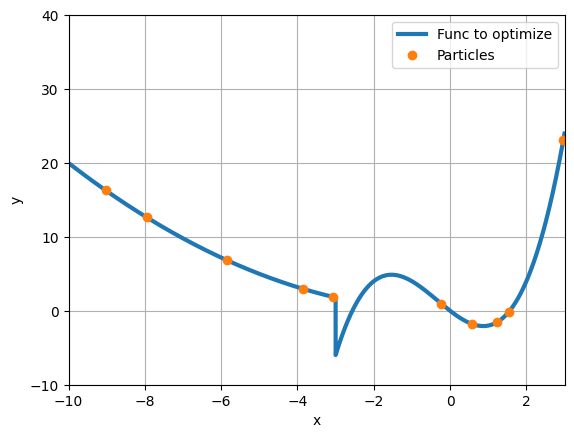

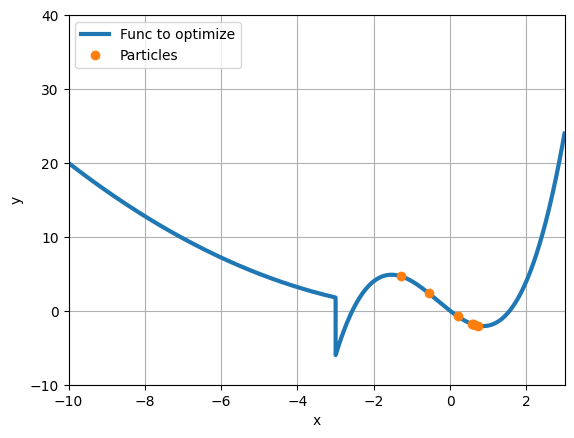

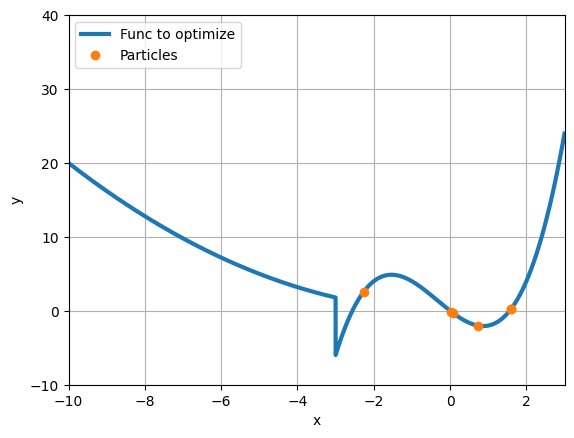

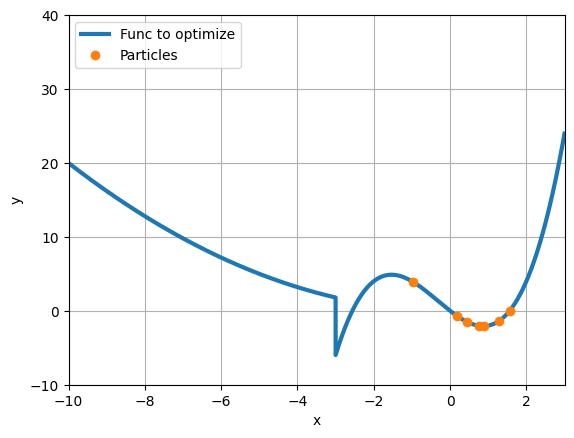

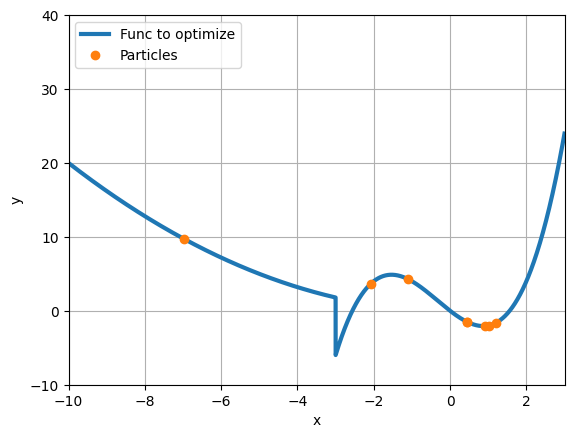

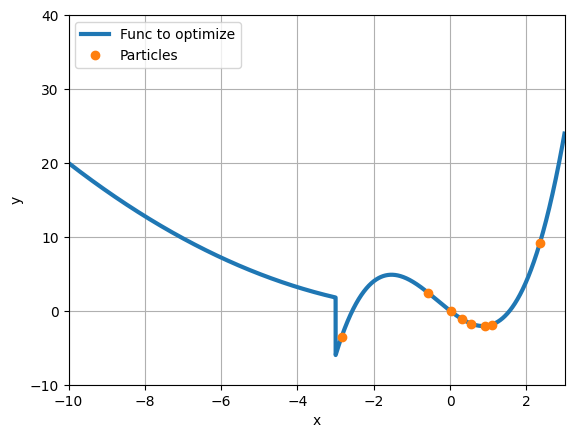

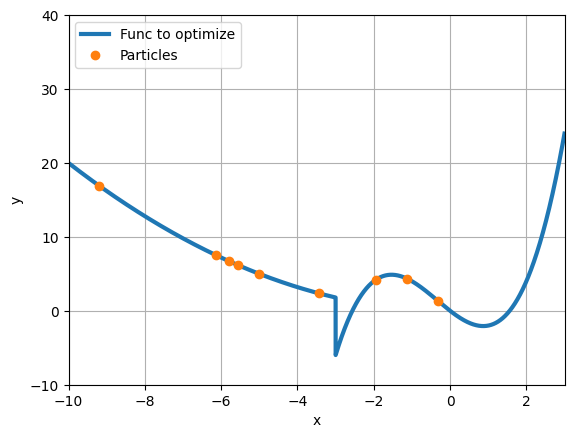

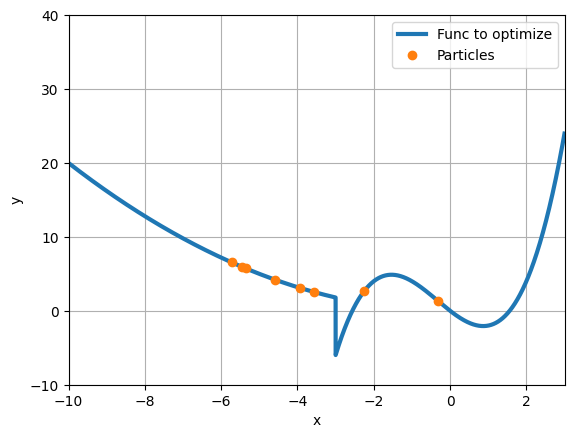

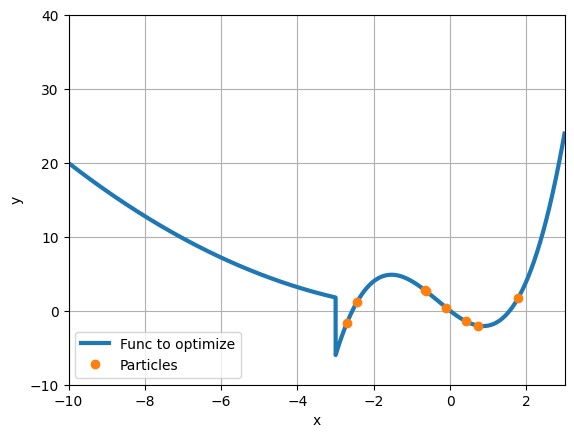

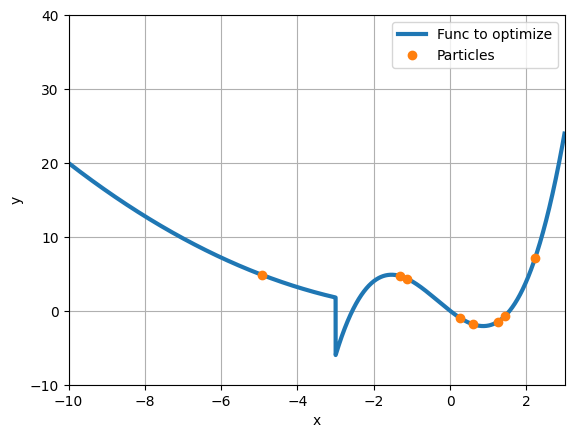

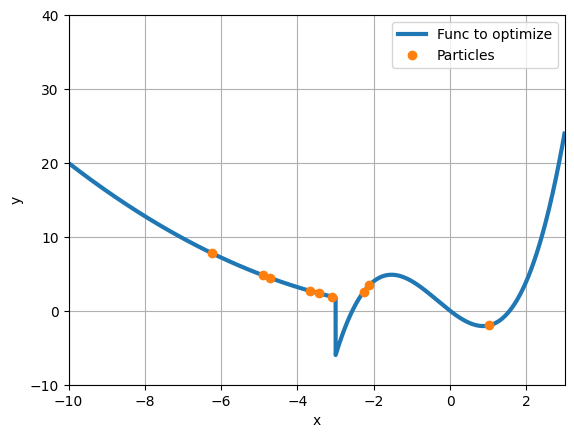

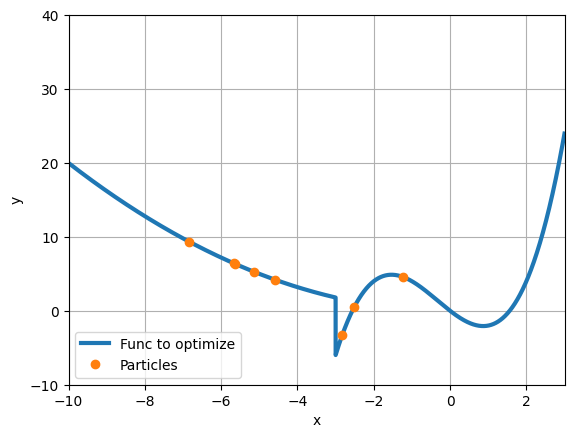

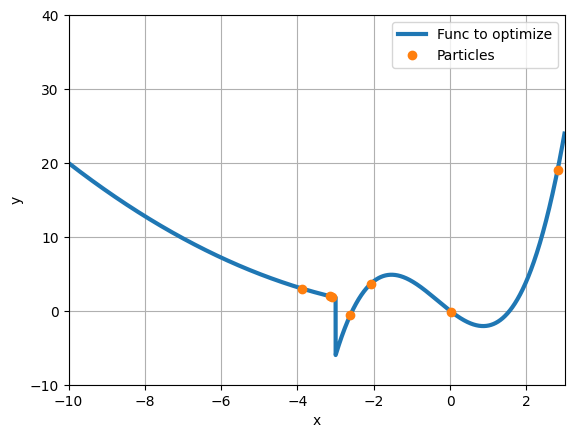

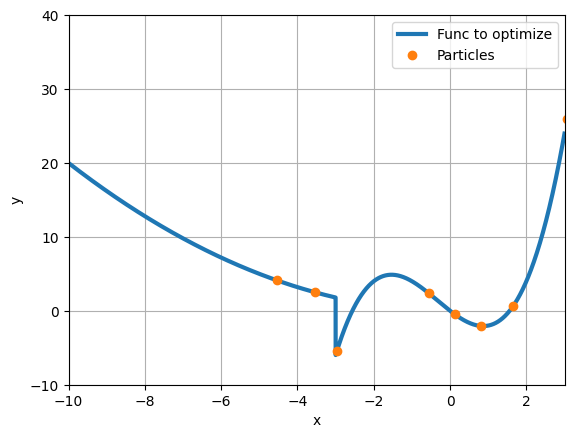

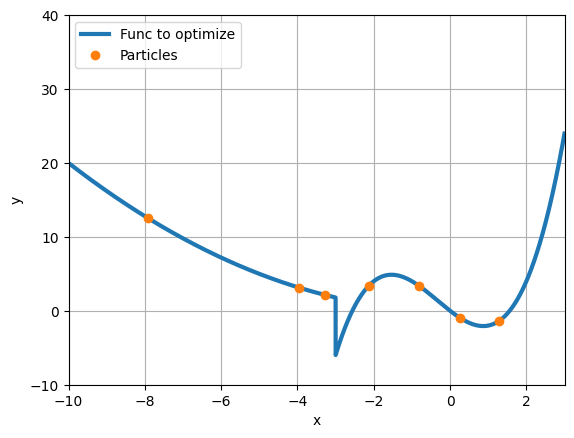

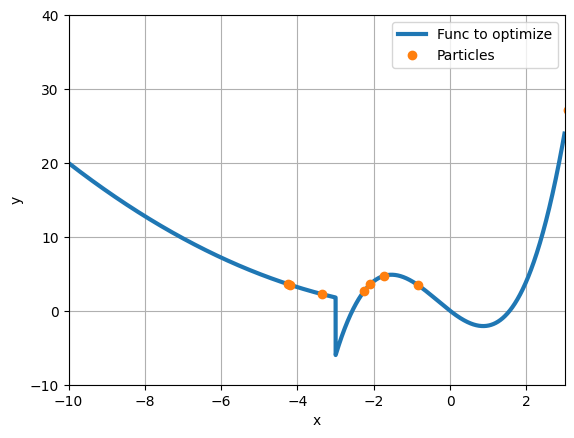

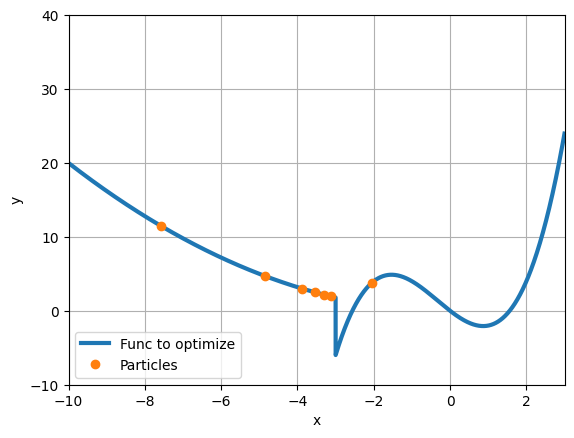

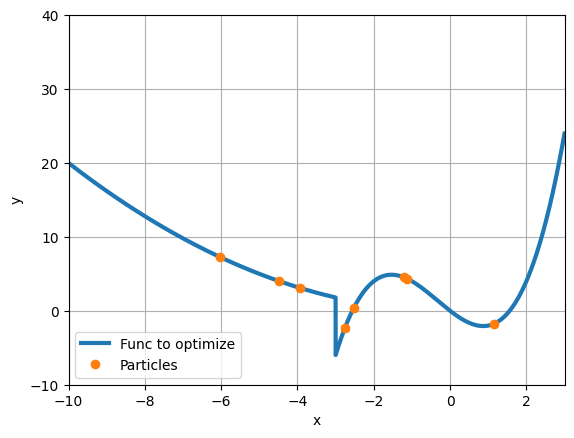

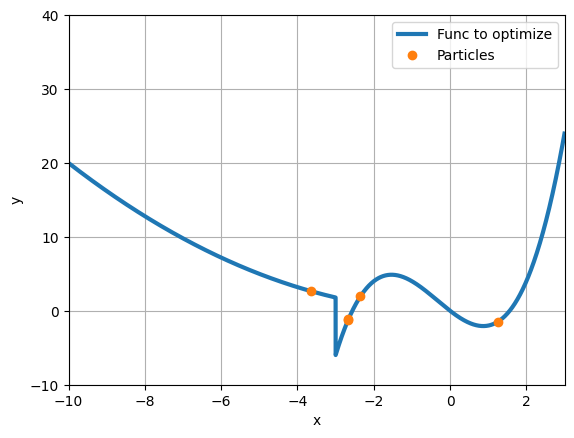

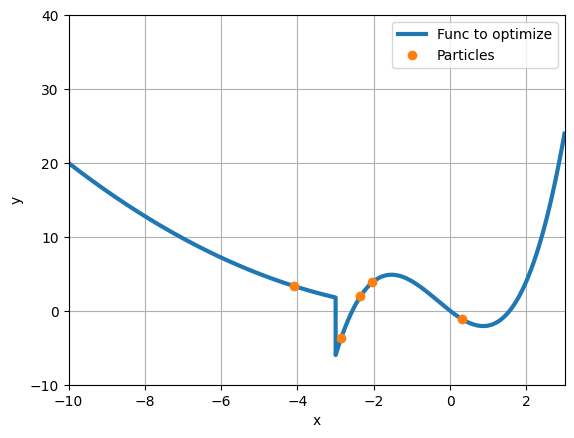

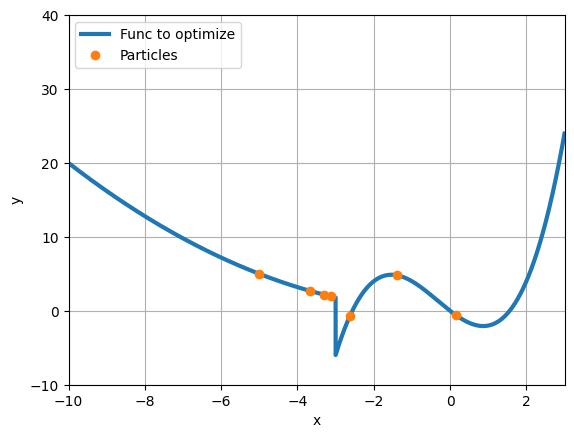

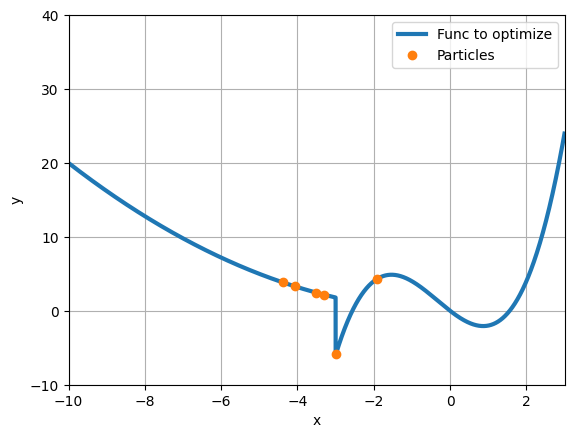

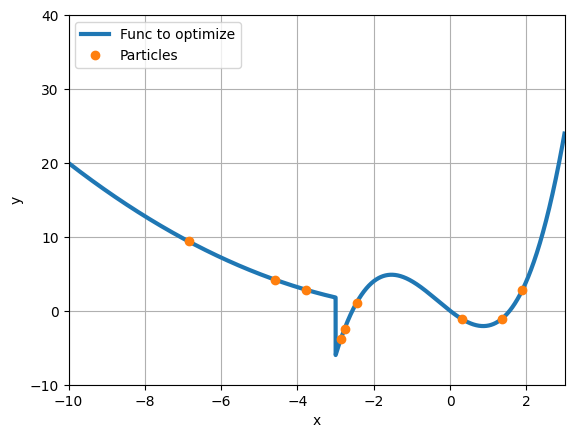

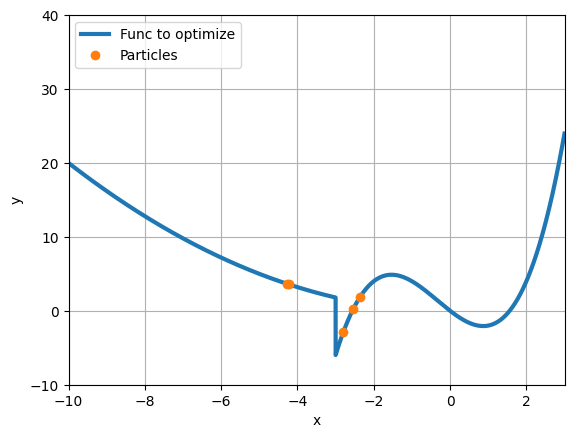

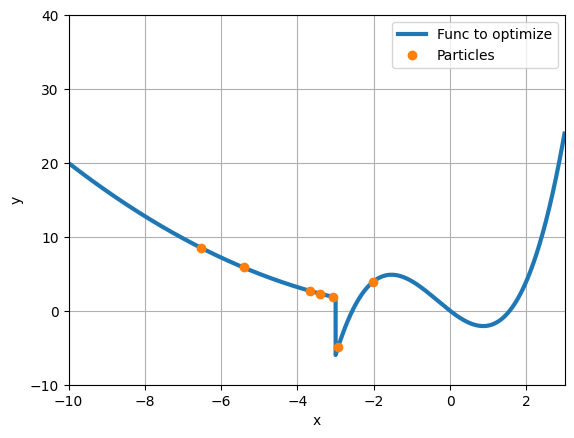

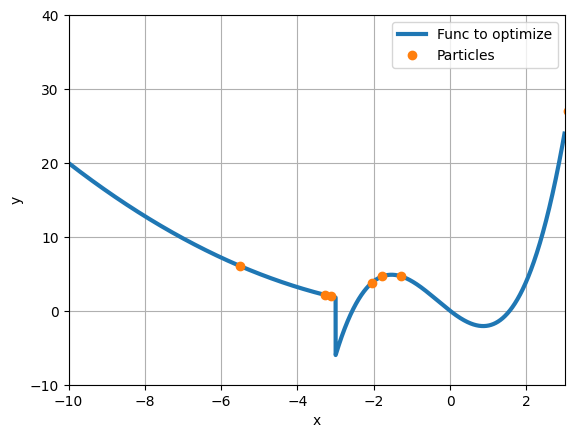

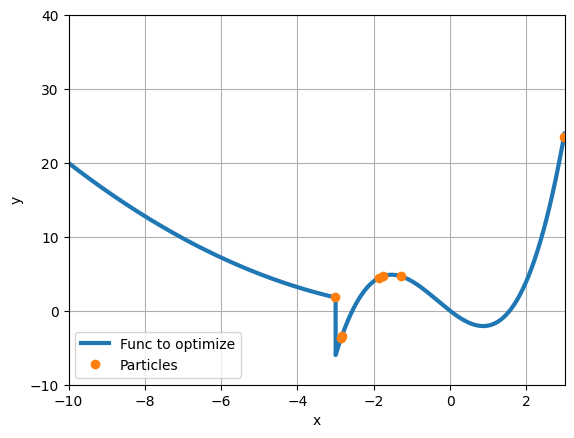

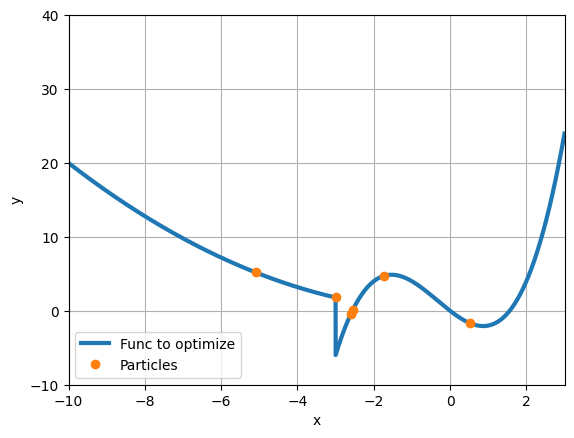

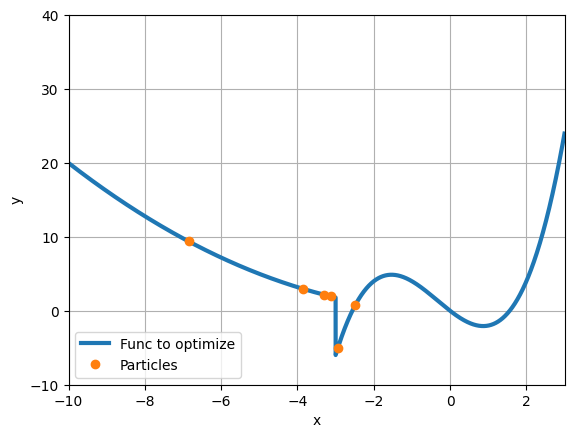

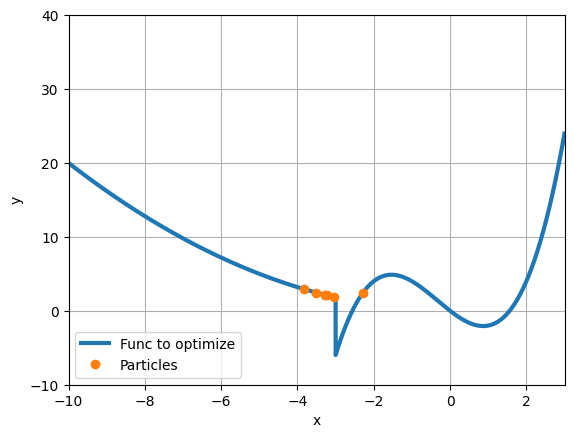

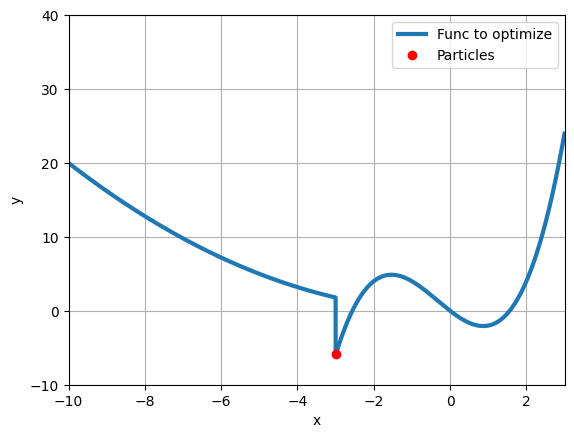

In [ ]:
for i, values in enumerate(l):
  plt.plot(x,y, lw=3, label='Func to optimize')
  plt.plot(values,function(values),marker='o', ls='', label='Particles')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.xlim(-10,3)
  plt.ylim(-10,40)
  plt.legend()
  plt.grid(True)
  plt.savefig(f'./animation/{i}.png')
  plt.show()
plt.plot(x,y, lw=3, label='Func to optimize')
plt.plot(swarm_best_position,function([swarm_best_position]),marker='o',color='red', ls='', label='Particles')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-10,3)
plt.ylim(-10,40)
plt.legend()
plt.grid(True)
plt.savefig(f'./animation/{i+1}.png')
plt.show()

In [ ]:
frames = [Image.open('./animation/'+image) for image in files]
frame_one = frames[0]
frame_one.save("PSO.gif", format="GIF", append_images=frames,
            save_all=True, duration=500, loop=0)